# Linear, Ridge and Lasso Regression

The boston housing data was removed from sklearn and hence, need to import it indirectly

In [78]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [79]:
# List of column names (Boston dataset has 13 features + 1 target column)
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
    'PTRATIO', 'B', 'LSTAT', 'MEDV'  # MEDV is usually the target (house prices)
]

# Combine data and target into a DataFrame with column names
dataset = pd.DataFrame(data, columns=column_names[:-1])  # Use the feature column names
dataset['Price'] = target  # Add the target column (house prices)

# Display the DataFrame with headers
print(dataset.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [24]:
dataset.shape

(506, 14)

In [80]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [81]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

### STARTING WITH LINEAR REGRESSION

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
linear_reg = LinearRegression()
mse = cross_val_score(linear_reg,X,y,cv = 5, scoring = 'neg_mean_squared_error')
print(mse)

[-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]


In [62]:
np.mean(mse)

-37.13180746769923

In [82]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y, test_size=0.33, random_state = 33)

In [83]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [84]:
predictions = linear_reg.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predictions,y_test)
print(mse)

22.027772192633165


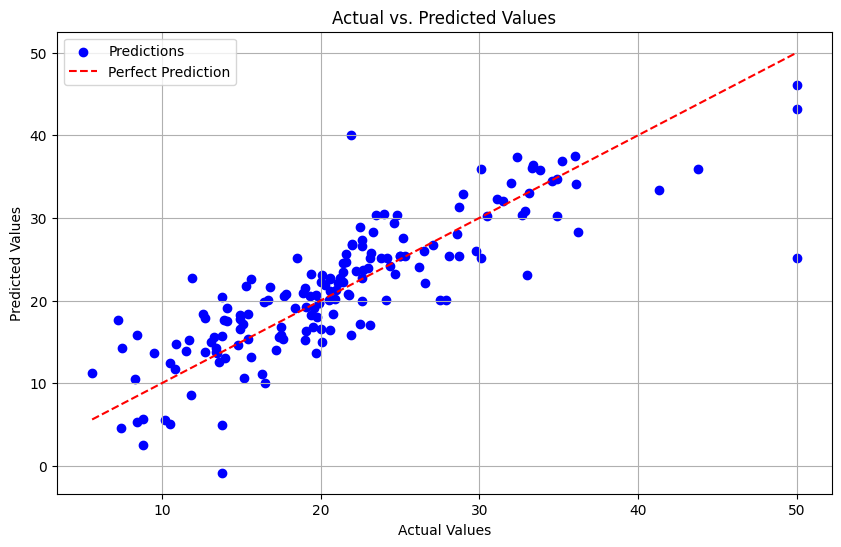

In [86]:
import matplotlib.pyplot as plt

# Assuming y_test are the actual values and predictions are the predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, predictions, color='blue', label='Predictions')

# Adding a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Adding labels and title
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

### APPLYING RIDGE REGRESSION 

In [90]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
params = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge, params,scoring = 'neg_mean_squared_error', cv=5)

In [91]:
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [92]:
best_alpha = ridge_regressor.best_params_
print(best_alpha)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-25.839760488384535


In [93]:
ridge_predictions = ridge_regressor.predict(X_test)

In [74]:
ridge_mse = mean_squared_error(ridge_predictions,y_test)
print(ridge_mse)

22.051318221712553


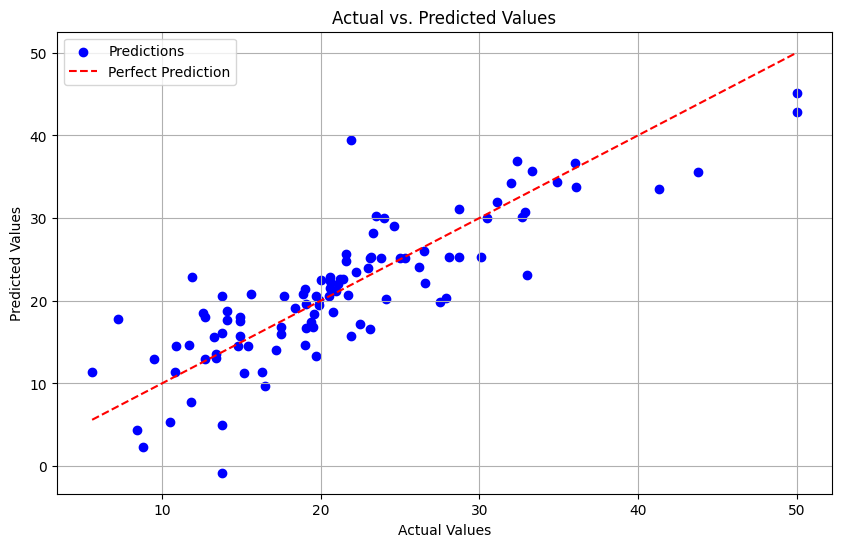

In [75]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, ridge_predictions, color='blue', label='Predictions')

# Adding a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Adding labels and title
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

### APPLYING LASSO REGRESSION

In [76]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, params,scoring = 'neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train,y_train)

D:\Anaconda\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.348e+03, tolerance: 2.941e+00
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.413e+03, tolerance: 2.735e+00
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.109e+03, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [77]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-25.365699783764892


In [95]:
lasso_predictions = lasso_regressor.predict(X_test)
lasso_mse = mean_squared_error(lasso_predictions,y_test)
print(lasso_mse)

21.40325720914995


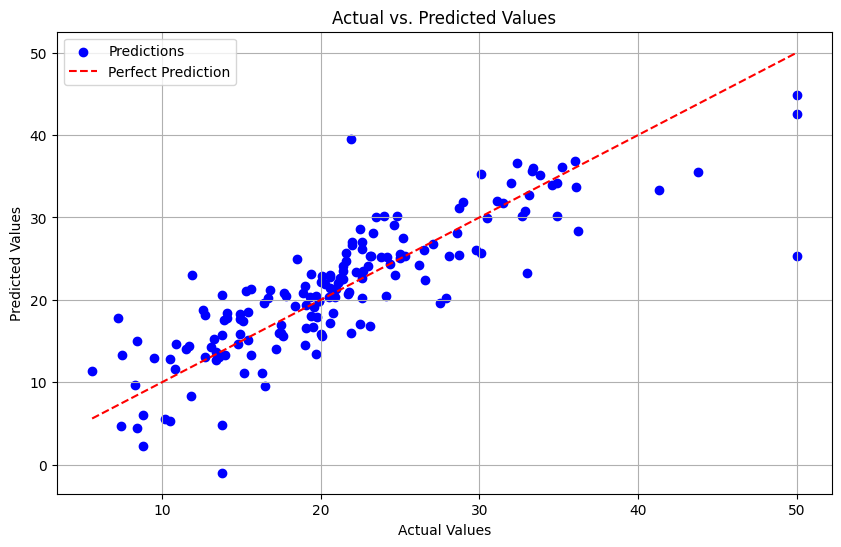

In [96]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, lasso_predictions, color='blue', label='Predictions')

# Adding a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Adding labels and title
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the legend
plt.legend()

# Show the plot
plt.grid()
plt.show()